Before you turn this notebook in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [60]:
NAME = "Ishan Ranjan"

_Understanding Deep Learning_

---

<a href="https://colab.research.google.com/github/DL4DS/sp2024_notebooks/blob/main/release/disc01/00_fundamentals.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 00. Fundamentals of PyTorch

In [61]:
# imports

import numpy as np
import torch
torch.__version__

'2.1.1'

## Goal of this notebook
- Introduction to PyTorch
- Understanding Tensors
- Fundamental Tensor Operations and Methods
- Few Questions to test your understanding

***

## Brief Introduction to PyTorch



####  Origin Story

Picture the early 2000s, when there was a need to develop ML frameworks that were flexible enough for daily research tasks. Out of this need, the Torch framework was born. Torch was released in 2002 out of the efforts of Ronan Collobert, Koray Kavukcuoglu, and Clement Farabet. It was later picked up by Facebook AI Research and many other people from several universities and research groups. Although Torch did give the required flexibility, it was written in Lua, which was not a very popular language, and the major drawback the community faced was the learning curve to the new language. 

The widespread acceptance of Pyhon in the ML community made the developers pivot to Python, and thus the Python based version of Torch a.k.a PyTorch was born. PyTorch began as an internship project by Adam Paszke, who was working under Soumith Chintala, a core developer of Torch.

Ref: https://subscription.packtpub.com/book/data/9781788834131/1/ch01lvl1sec02/understanding-pytorch-s-history

#### In a nutshell

PyTorch is an open-source machine learning framework that allows you to write your own neural networks and optimize them efficiently. It was primarily developed by Facebook's AI Research Lab (FAIR). It is based on the Torch library, which is a scientific computing framework with wide support for machine learning algorithms. PyTorch is a Python package that provides two high-level features:
* A replacement for NumPy to use the power of GPUs and other accelerators.
* An automatic differentiation library that is useful to implement neural networks.

#### Why use PyTorch?
1. PyTorch is Pythonic: Ease of using Popular Python packages like NumPy, SciPy, etc to extend the functionality of PyTorch.
2. Easy to Learn: Due to its easy and intuitive syntax.
3. Strong Community Support: PyTorch has a strong community of developers and researchers who have contributed to the framework. When in doubt, you may most likely see a solution to your problem on https://discuss.pytorch.org/.


Pytorch Governence: https://pytorch.org/docs/stable/community/governance.html

***

## Tensors

Tensors are the basic building blocks of modern deep learning frameworks. A tensor is a generalization of vectors and matrices and is easily understood as a multidimensional array. A tensor can be a number, a vector, a matrix, or an n-dimensional array, or in general terms a container storing numerical values.

Recommended viewing to understand tensors: What's a Tensor? - Dan Fleisch (https://www.youtube.com/watch?v=f5liqUk0ZTw)

##### Types of Tensor:
* Scalar / 0-D tensor: A container with a single value. (Ex: 23, 5, 2, etc)
* Vector / 1-D tensor: A container with multiple values. (Ex: [1, 2, 3, 4, 5])
* Matrix / 2-D tensor: A container with multiple values arranged in rows and columns. (Ex: [[1, 2, 3], [4, 5, 6], [7, 8, 9]])
* In general, 2-D tensors are called matrices (Matrix, if singular), and anything above 2-D are just called tensors.

##### Rank of a Tensor:

A tensor of rank 1 is a vector, which is a one-dimensional array, 
```python
[a,b]
```
A tensor of rank 2 is a vector of vectors, or a matrix, or a two-dimensional array,
```python
[[a,b],[c,d]]
```
A tensor of rank 3 is a vector of vectors of vectors, so something with three nestings,
```python
[[[a,b],[c,d]],[[e,f],[g,h]]]
```
and so on...

Broadly, a tensor can be understood to be a vector of vectors of vectors of vectors... and so on. The rank is the number of nestings of "of vectors". 

Or in other words, Rank can be described as the number of information needed to specify a particular element of a tensor. For example, to specify an element in a 2-D tensor, we need 2 pieces of information, the row and the column. So, the rank of a 2-D tensor is 2.

#### Pitfall:
##### Are Matrices and 2-D tensors the same?    

A 2-D tensor can be represented by a matrix, but there is more to a tensor than just its arrangement of numerical values. A tensor is a geometric object, whose components obey certain transformation laws. A matrix is just a collection of numbers in a rectangular array, there's no inherent rule that they have to obey any transformation rules.

Video is a series of images correlated over time. We can use tensors to represent that correlation better and more intuitively than trying to convert it down to two-dimensional matrices. A third-rank tensor can encode all the aspects of each image (height, width, and color), while a rank-4 tensor could also hold information about time or order for the images.

***

## Creating Tensors

In [62]:
t = torch.tensor([1, 2, 3],
                 dtype=torch.float32,
                 device='cpu',
                 requires_grad=True)
t

tensor([1., 2., 3.], requires_grad=True)

In [63]:
# scalar
scalar = torch.tensor(10)

# vector
vector = torch.tensor([10, 20, 30])

# matrix
matrix = torch.tensor([[10, 20, 30], [40, 50, 60]])

# To check the shape of a tensor, use the .shape property
print(f'Shape of scalar: {scalar.shape}, vector: {vector.shape}, matrix: {matrix.shape}')

# To check the number of dimensions of a tensor, use the .ndim property
print(f'Number of dimensions of scalar: {scalar.ndim}, vector: {vector.ndim}, matrix: {matrix.ndim}')

Shape of scalar: torch.Size([]), vector: torch.Size([3]), matrix: torch.Size([2, 3])
Number of dimensions of scalar: 0, vector: 1, matrix: 2


There are many other methods for creating tensors, a few of which are listed below:

In [64]:
t = torch.zeros(2, 3)                # creates a tensor with 0s, by passing the shape as arguments
t_zeros = torch.zeros_like(t)        # zeros_like returns a new tensor, with the same shape as the input tensor, but filled with 0s
t_ones = torch.ones(2, 3)            # creates a tensor with 1s
t_fives = torch.empty(2, 3).fill_(5) # creates a non-initialized tensor and fills it with 5
t_random = torch.rand(2, 3)          # creates a uniform random tensor
t_normal = torch.randn(2, 3)         # creates a normal random tensor
t_randint = torch.randint(low=0, high=10, size=(2, 3)) # creates a random tensor with integers between low and high (exclusive)

np_array = np.zeros((2, 3))
t_from_np = torch.from_numpy(np_array) # creates a tensor from a numpy array

print(t_zeros)
print(t_ones)
print(t_fives)
print(t_random)
print(t_normal)
print(t_randint)
print(t_from_np)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[0.3173, 0.4194, 0.0163],
        [0.7111, 0.7837, 0.6585]])
tensor([[-0.3134, -0.0843, -0.1729],
        [-0.6815, -1.0227, -0.0751]])
tensor([[0, 3, 4],
        [9, 2, 2]])
tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)


Note that the tensor dimensions can be direct arguments, or a collection like a
tuple or list.

In [65]:
t1 = torch.rand(2, 3)
print(t1)

t2 = torch.rand((2, 3))
print(t2)

t3 = torch.rand([2, 3])
print(t3)

tensor([[0.8297, 0.1416, 0.3217],
        [0.8403, 0.0139, 0.0618]])
tensor([[0.1611, 0.6558, 0.2958],
        [0.0541, 0.6938, 0.7529]])
tensor([[0.6873, 0.0716, 0.9869],
        [0.4623, 0.0241, 0.4247]])


The underscore in `t_fives = torch.empty(2, 3).fill_(5)` signifies that the operation is performed in-place. For example, `t_fives.add_(5)` will add 5 to each element of the tensor `t_fives` in-place. Other examples of in-place operations are `t_fives.mul_(5)`, `t_fives.div_(5)`, etc.


In [66]:
t_fives_add = t_fives + 5
print(t_fives_add)
t_fives.add_(5) # in-place addition
print(t_fives)

tensor([[10., 10., 10.],
        [10., 10., 10.]])
tensor([[10., 10., 10.],
        [10., 10., 10.]])


In [67]:
# Accesing the scalar value of a tensor
print(t_fives[0, 1].item()) # item() returns the value of a tensor as a standard Python number
print(type(t_fives[0, 1].item())) 

10.0
<class 'float'>


***

## Operations on Tensors

### Reshaping Tensors

In [68]:
# Reshape
t = torch.rand(2, 3)
print(t)
print(t.reshape(3, 2))
print(t.reshape(6))
print(t.reshape(1, 6))
print(t.reshape(6, 1))
print(t.reshape(3, -1)) # -1 means "infer the correct value from the shape of the tensor"
print(t.view(3, -1)) # view is an alternative to reshape

tensor([[0.8266, 0.7303, 0.4947],
        [0.8525, 0.0438, 0.8469]])
tensor([[0.8266, 0.7303],
        [0.4947, 0.8525],
        [0.0438, 0.8469]])
tensor([0.8266, 0.7303, 0.4947, 0.8525, 0.0438, 0.8469])
tensor([[0.8266, 0.7303, 0.4947, 0.8525, 0.0438, 0.8469]])
tensor([[0.8266],
        [0.7303],
        [0.4947],
        [0.8525],
        [0.0438],
        [0.8469]])
tensor([[0.8266, 0.7303],
        [0.4947, 0.8525],
        [0.0438, 0.8469]])
tensor([[0.8266, 0.7303],
        [0.4947, 0.8525],
        [0.0438, 0.8469]])


`view` and `reshape` gave the same result. What's the difference? 

`view()` will try to change the shape of the tensor while keeping the underlying data allocation the same, thus data will be shared between the two tensors. `reshape()` will create a new underlying memory allocation if necessary.

When you use `reshape()` instead of view, the matrix is made contiguous if that is necessary, but otherwise the same data is used. This is nice if you don't care much about memory use. If you want to be sure that you're not accidentally copying a large matrix, `view()` is the way to go.

Additional Reading: https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch, https://discuss.pytorch.org/t/whats-the-difference-between-torch-reshape-vs-torch-view/159172/3

### Pytorch Data Types

Available data types include:

```python
torch.bool
torch.int8
torch.uint8
torch.int16
torch.int32
torch.int64
torch.half = torch.float16
torch.float = torch.float32 (default datatype)
torch.double = torch.float64
torch.bfloat16
```

When not specified, the default is `torch.float32`, which differs from plain 
python where the default floating point datatype is `float64`.

Ref: https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html

In [69]:
a = torch.ones((2, 3), dtype=torch.int16) # creates a tensor with 1s of type int16
print(a)

b = torch.rand((2, 3), dtype=torch.float64) * 20 # creates a random tensor of type float64 and multiplies it by 20
print(b)

c = b.to(torch.int32) # converts the tensor of type float64 to type int32
print(c)

d = torch.randn([2, 3]) # creates a random tensor of type float32
print(d)
print(d.dtype)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
tensor([[19.4122, 17.1596, 12.4648],
        [13.1902,  1.7065, 14.1653]], dtype=torch.float64)
tensor([[19, 17, 12],
        [13,  1, 14]], dtype=torch.int32)
tensor([[-0.4717,  0.7573,  0.5341],
        [ 1.3427,  1.6101,  0.0722]])
torch.float32


Also note that when the tensor is the default datatype, the `dtype` is not printed.

In [70]:
t = torch.randn(5, 6)
print(t, t.dtype)
t = t.double()  # converts to 64-bit float
print(t)
t = t.byte()    # converts to unsigned 8-bit integer
print(t)

tensor([[ 0.6396, -0.7864, -0.0989, -0.7703,  0.3604,  0.3166],
        [-0.8975, -0.6393,  1.7483,  0.6535, -0.3058, -0.8809],
        [ 0.0695,  1.1862,  0.6836, -0.2528, -1.0560,  0.0409],
        [ 1.0752, -0.5528, -0.9605, -0.4558,  0.4733,  0.2921],
        [-0.2326,  1.8261,  1.0807, -0.7225, -0.4792,  0.6756]]) torch.float32
tensor([[ 0.6396, -0.7864, -0.0989, -0.7703,  0.3604,  0.3166],
        [-0.8975, -0.6393,  1.7483,  0.6535, -0.3058, -0.8809],
        [ 0.0695,  1.1862,  0.6836, -0.2528, -1.0560,  0.0409],
        [ 1.0752, -0.5528, -0.9605, -0.4558,  0.4733,  0.2921],
        [-0.2326,  1.8261,  1.0807, -0.7225, -0.4792,  0.6756]],
       dtype=torch.float64)
tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   1,   0,   0,   0],
        [  0,   1,   0,   0, 255,   0],
        [  1,   0,   0,   0,   0,   0],
        [  0,   1,   1,   0,   0,   0]], dtype=torch.uint8)


#### ``torch.float16`` vs ``torch.float32``

- Reduced Memory Usage:   
    - ``torch.float16`` uses half as much memory per element compared to ``torch.float32``. This can be significant when dealing with large neural networks or datasets, especially on GPUs with limited memory.    
    - It allows you to store and process larger models or batches of data.  
    
- Faster Computation and Reduced Bandwidth (While transferring from CPU to GPU, or across network connections)

- Trade-offs: 
    - Reduced Precision - may lead to rounding errors in calculations.
    - Not all deep learning models and operations are compatible with ``torch.float16``. Some operations may require ``torch.float32`` or higher precision to maintain accuracy.
    - Training with ``torch.float16`` can be more challenging as it can lead to convergence issues, especially in complex models.

### Mathematical Operations

In [71]:
a = torch.ones(2, 3)
b = torch.ones(2, 3)
print(f'a+b = {a+b}\n')

c = torch.ones(2, 3) * 2
print(f'c = {c}\n')

d = torch.ones(2, 3) + 1 # broadcasting
print(f'd = {d}\n')

fours = c ** 2 # element-wise exponentiation
print(f'fours = {fours}\n')

powers2 = c ** torch.tensor([1, 2, 3]) # element-wise exponentiation with broadcasting
print(f'powers2 = {powers2}\n')

print(f'c/powers2 = {c/powers2}\n')

a+b = tensor([[2., 2., 2.],
        [2., 2., 2.]])

c = tensor([[2., 2., 2.],
        [2., 2., 2.]])

d = tensor([[2., 2., 2.],
        [2., 2., 2.]])

fours = tensor([[4., 4., 4.],
        [4., 4., 4.]])

powers2 = tensor([[2., 4., 8.],
        [2., 4., 8.]])

c/powers2 = tensor([[1.0000, 0.5000, 0.2500],
        [1.0000, 0.5000, 0.2500]])



#### Matrix Multiplication: 

Things to keep in mind:
* Inner dimensions must match (Ex: 2x3 and 3x4)
* The resulting matrix has the shape of the outer dimensions (Ex: 2x4)

In [72]:
# Matrix multiplication

A = torch.rand(2, 3)
B = torch.rand(3, 4)
C = torch.mm(A, B) # matrix multiplication
print(C, C.shape)


tensor([[1.3538, 0.6570, 0.8100, 1.4314],
        [1.3472, 0.6824, 0.7508, 1.1438]]) torch.Size([2, 4])


There are other ways of performing matrix multiplication in PyTorch, such as torch.matmul(), torch.bmm(), and the @ operator. Read more at: https://www.geeksforgeeks.org/python-matrix-multiplication-using-pytorch/

### Indexing and Slicing

In general PyTorch tensors behave similarly to Numpy arrays. They are zero indexed and support slicing.

In [73]:
t = torch.rand(2, 3)
print(t)
print(t[0, 0]) # access a single element
print(t[0, :]) # access a row
print(t[:, 0]) # access a column
print(t[0:2, 0:2]) # access a sub-matrix


tensor([[0.3619, 0.3321, 0.2521],
        [0.2576, 0.2644, 0.6970]])
tensor(0.3619)
tensor([0.3619, 0.3321, 0.2521])
tensor([0.3619, 0.2576])
tensor([[0.3619, 0.3321],
        [0.2576, 0.2644]])


In [74]:
t[0, 0] = 1 # modify a single element
print(t)
t[0, :] = 2 # modify a row with implicit broadcasting
print(t)
t[:, 0] = 3 # modify a column with implicit broadcasting
print(t)
t[0:2, 0:2] = 4 # modify a sub-matrix with implicit broadcasting
print(t)

tensor([[1.0000, 0.3321, 0.2521],
        [0.2576, 0.2644, 0.6970]])
tensor([[2.0000, 2.0000, 2.0000],
        [0.2576, 0.2644, 0.6970]])
tensor([[3.0000, 2.0000, 2.0000],
        [3.0000, 0.2644, 0.6970]])
tensor([[4.0000, 4.0000, 2.0000],
        [4.0000, 4.0000, 0.6970]])


### Other Commonly used tensor methods

In [75]:
t = torch.randn(2,3)
t.max()                 # returns the maximum value in a tensor
t.argmax()              # returns the index of the maximum value in a tensor.
t.sum(dim=0)            # sum across rows
t.sum(dim=1)            # sum across columns
t.t()                   # transpose
t.numel()               # number of elements in tensor
t.nonzero()             # indices of non-zero elements
t.squeeze()             # removes size 1 dimensions
t.unsqueeze(0)          # inserts a dimension

t = torch.rand(2, 3, 4)
print('Before permute:', t.shape)
t = t.permute(1, 0, 2)         # permutes dimensions: 1st dim becomes 2nd, 2nd becomes 1st, 3rd remains 3rd
print('After permute:', t.shape)
t = t.flatten(start_dim=1)     # flattens a tensor from the 2nd dimension
print('After flatten on 2nd dim:', t.shape)
t = t.flatten()                # flattens a tensor from the 1st dimension by default
print('After flattening the resultant tensor:', t.shape)

torch.dist(torch.tensor([3.0, 1.0]), torch.tensor([1.0, 2.0]), p=2) # computes the distance between two tensors, Returns the p-norm of (torch.tensor([3.0, 1.0]) - torch.tensor([1.0, 2.0])

torch.arange(0, 10)     # tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
torch.eye(3, 3)         # creates a 3x3 matrix with 1s in the diagonal (identity in this case)
t = torch.arange(0, 3)  # tensor([0, 1, 2])
torch.cat((t, t))       # tensor([0, 1, 2, 0, 1, 2])
torch.stack((t, t))     # tensor([[0, 1, 2],
                        #         [0, 1, 2]])

Before permute: torch.Size([2, 3, 4])
After permute: torch.Size([3, 2, 4])
After flatten on 2nd dim: torch.Size([3, 8])
After flattening the resultant tensor: torch.Size([24])


tensor([[0, 1, 2],
        [0, 1, 2]])

### Randomness

Having a piece of code that behaves randomly and that spews out different results every time you run it is not a good idea. Athough, as programmers, we do not deal with true randomness, we deal with psuedo-randomness. But torch.randn does seem to give out different results everytime we run it, and by definition is random isn't it? 

In a way, yes. But, the random numbers are not quite truly random. They are pseudo-random numbers, which means that a number generator is used to generate a sequence of numbers that appear to be random, but they are not. The sequence of numbers generated by a pseudo-random number generator is determined by a fixed initial value called the seed. Every time we give it the same seed, it will give us the same sequence of numbers.

In [76]:
# Without setting the seed, the results of the random operations will be different every time

random_1 = torch.rand(2, 3)
random_2 = torch.rand(2, 3)

print(random_1 == random_2)

tensor([[False, False, False],
        [False, False, False]])


In [77]:
# By setting the seed, the results of the random operations will be the same every time

torch.manual_seed(42)
random_1 = torch.rand(2, 3)
random_2 = torch.rand(2, 3)     # the second call to torch.rand(2, 3) will return different values than the first call
print(random_1 == random_2)
print()

torch.manual_seed(42)
random_3 = torch.rand(2, 3)
random_4 = torch.rand(2, 3)     
print(random_1 == random_3)
print(random_2 == random_4)
print()     

torch.manual_seed(42)
random_5 = torch.rand(2, 3)
torch.manual_seed(42)           # need to reset the seed again, to get the same values for the second call to torch.rand(2, 3)
random_6 = torch.rand(2, 3)
print(random_5 == random_6)

tensor([[False, False, False],
        [False, False, False]])

tensor([[True, True, True],
        [True, True, True]])
tensor([[True, True, True],
        [True, True, True]])

tensor([[True, True, True],
        [True, True, True]])


When training a neural network, we use random initialization of weights, shuffling of data during training, and dropout, among other techniques. All these involve randomness, which can lead to slightly different results each time we run the code unless we set a seed. This can be problematic when trying to replicate someone else’s results or debugging your own code.

Additional Reading: https://pieriantraining.com/how-to-set-the-seed-in-pytorch-for-reproducible-results/

***

# Questions

Q1. Create a tensor of shape (2, 3, 2)

In [78]:
# Your solution code here
tensor1 = None
# YOUR CODE HERE
tensor1 = torch.rand(2, 3, 2)
print(tensor1.shape)

torch.Size([2, 3, 2])


In [79]:
assert tensor1.shape == (2, 3, 2)

Q2. Create an RGB image tensor of image shape 3x256x256 and having a pixel range between 0 and 255, with 3 equally spaced vertical strips of Red, Green, and Blue. Convert the image to GrayScale using the formula: Y' = 0.299 R + 0.587 G + 0.114 B

Desired RGB image   

<img src="Q2_desired_image.jpeg" alt="title" width="500"/>


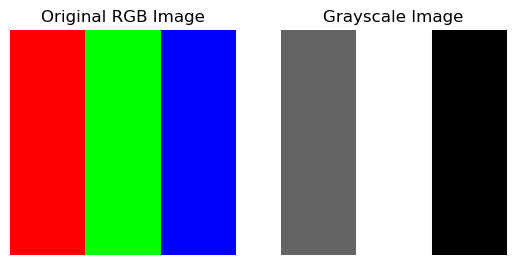

In [80]:
import torch
import matplotlib.pyplot as plt

# Create a 3x256x256 dimensional tensor
image_tensor = None
# YOUR CODE HERE
image_tensor = torch.zeros(3, 256, 256)



# Set values for Red, Green, and Blue strips
image_tensor[0, :, :85] = 255.0  # Set all values in the red channel to 1.0
# Set the values for the green strip
image_tensor[1, :, 85:171] = 255.0  # Set all values in the green channel to 1.0 for the middle strip
# Set the values for the blue strip
image_tensor[2, :, 171:] = 255.0  # Set all values in the blue channel to 1.0 for the right strip


# Convert the RGB range [0, 255] to [0, 1]
image_tensor /= 255.0

# Convert RGB to Grayscale using the formula
grayscale_tensor = (0.299 * image_tensor[0, : , :]) + (0.587 * image_tensor[1, :, :]) + (0.114 * image_tensor[2, :, :])

# Convert PyTorch tensors to NumPy arrays for plotting
# Make sure to use permute to switch the dimensions of the tensor to the correct order (H, W, C) for plotting.
rgb_image_np = image_tensor.permute(1, 2, 0).numpy()
grayscale_image_np = grayscale_tensor.numpy()

# Plot the original RGB image
plt.subplot(1, 2, 1)
plt.imshow(rgb_image_np)
plt.title('Original RGB Image')
plt.axis('off')

# Plot the grayscale image
plt.subplot(1, 2, 2)
plt.imshow(grayscale_image_np, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Show the plots
plt.show()


In [81]:
assert image_tensor.shape == (3, 256, 256)

#### Thought experiments (No submissions required)

- Why do we rescale the pixel values to be between 0 and 1? 

    - Normalizing the pixel values is a common practice in image processing. It helps in Numerical stability, ease in computation, and helps maintain consistency as many ML algorithms assume that the data is normalized.    
<br>

- Why did the Blue strip correspond to the Blackest strip in the grayscale image?

    - Hint: Check the RGB to Grayscale conversion formula. The answer lies in the weights assigned to each color channel.

Q3. Switch the Red and Blue stripes of the image obtained in Q2.

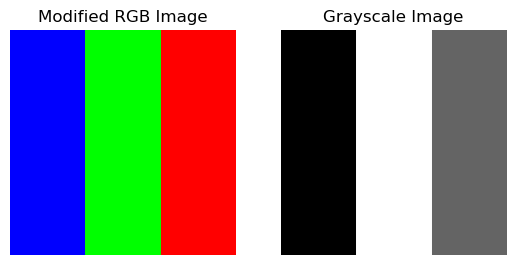

In [82]:
# Create a 3x256x256 dimensional tensor
image_tensor = torch.zeros(3, 256, 256)
# YOUR CODE HERE

# Set values for Red, Green, and Blue strips (Note: the strips are switched)
# YOUR CODE HERE
# Set values for Red, Green, and Blue strips
image_tensor[0, :, 171:] = 255.0  # Set all values in the red channel to 1.0
# Set the values for the green strip
image_tensor[1, :, 85:171] = 255.0  # Set all values in the green channel to 1.0 for the middle strip
# Set the values for the blue strip
image_tensor[2, :, :85] = 255.0  # Set all values in the blue channel to 1.0 for the right strip
# Convert the RGB range [0, 255] to [0, 1]
image_tensor /= 255.0

# Convert RGB to Grayscale using the formula
grayscale_tensor = (0.299 * image_tensor[0, : , :]) + (0.587 * image_tensor[1, :, :]) + (0.114 * image_tensor[2, :, :])

# Convert PyTorch tensors to NumPy arrays for plotting
# Make sure to use permute to switch the dimensions of the tensor to the correct order (H, W, C) for plotting.
rgb_image_np = image_tensor.permute(1, 2, 0).numpy()
grayscale_image_np = grayscale_tensor.numpy()

# Plot the Modified RGB image
plt.subplot(1, 2, 1)
plt.imshow(rgb_image_np)
plt.title('Modified RGB Image')
plt.axis('off')

# Plot the grayscale image
plt.subplot(1, 2, 2)
plt.imshow(grayscale_image_np, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Show the plots
plt.show()


In [83]:
assert image_tensor.shape == (3, 256, 256)

Q4. Set the seed to 0 and Perform Matrix Multiplication on the two tensors below. Hint: You may need to transpose one of the tensors.

In [84]:
# 3 Set the seed to 0 and Perform Matrix Multiplication on the two tensors below. Hint: You may need to transpose one of the tensors.

torch.manual_seed(0)

X = torch.rand(3, 7)
Y = torch.rand(4, 7)

R = None
# Transpose tensor Y
X_transposed = X.t()

# Perform matrix multiplication
R = torch.mm(Y, X_transposed)
R


tensor([[1.6838, 1.9499, 1.8029],
        [0.8279, 0.9564, 1.4137],
        [1.0347, 1.3146, 1.7786],
        [1.2498, 1.1037, 1.0244]])

In [85]:
assert R.shape == (4, 3)

Q5. Get the maximum value and its index across (i) each row of tensor R, (ii) each column of tensor R, and (iii) the entire tensor R.

Note: .max() returns a namedtuple (values, indices) where values is the maximum value of each row of the tensor R, and indices is the index of the maximum value of each row of the tensor R. Make sure to return the values and indices separately in the code.

In [86]:
# Max value across the rows
# YOUR CODE HERE
R_max_rows, R_max_rows_index = torch.max(R, dim=1)
print(R_max_rows, R_max_rows_index)

# Max value across the columns
# YOUR CODE HERE
# Max value across the columns
R_max_cols, R_max_cols_index = torch.max(R, dim=0)
print(R_max_cols, R_max_cols_index)

# Max value across all the elements
# YOUR CODE HERE
# Max value across all the elements
R_max = torch.max(R)
R_max_index = torch.argmax(R)
print(R_max, R_max_index)

tensor([1.9499, 1.4137, 1.7786, 1.2498]) tensor([1, 2, 2, 0])
tensor([1.6838, 1.9499, 1.8029]) tensor([0, 0, 0])
tensor(1.9499) tensor(1)


In [87]:
assert R.shape == (4, 3)

Q6. Set Seed to 0. Create a tensor of shape (2, 3) and find the indices of the elements that are greater than the mean of the tensor.

In [88]:
# Create a tensor of shape (2, 3) and find the indices of the elements that are greater than the mean of the tensor.

torch.manual_seed(0)
tensor = torch.rand(2, 3)
print(tensor)
indices = None
# YOUR CODE HERE
mean = tensor.mean()
indices = torch.nonzero(torch.gt(tensor, mean))
print(indices)

tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341]])
tensor([[0, 0],
        [0, 1],
        [1, 2]])


In [89]:
assert tensor.shape == (2, 3)

Q7. Compute the mean tensor of each class. The mean tensor can be considered as the prototype of the batch. For the following tensors, assign the class label to each tensor based on the distance between the tensor and the prototypes (use torch.dist(...)).

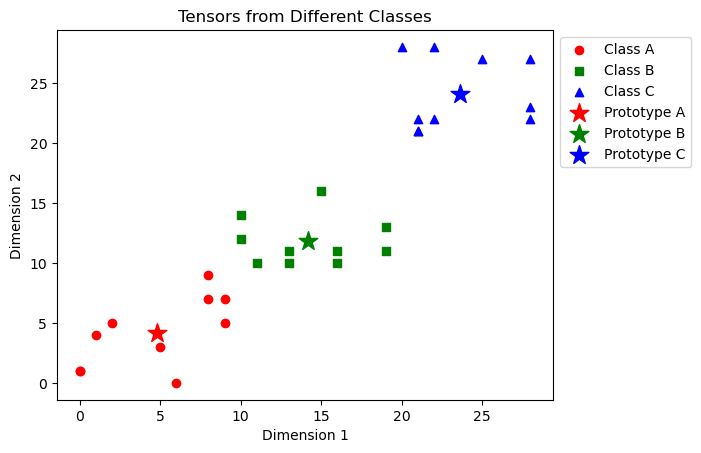

In [90]:
torch.manual_seed(2)

class_A_tensors = torch.vstack([torch.randint(0, 10, size=(2,), dtype=torch.float32) for _ in range(10)])
class_B_tensors = torch.vstack([torch.randint(10, 20, size=(2,), dtype=torch.float32) for _ in range(10)])
class_C_tensors = torch.vstack([torch.randint(20, 30, size=(2,), dtype=torch.float32) for _ in range(10)])

class_A_prototype = None
class_B_prototype = None
class_C_prototype = None

# Compute the prototypes
# YOUR CODE HERE
class_A_prototype = class_A_tensors.mean(dim=0)
class_B_prototype = class_B_tensors.mean(dim=0)
class_C_prototype = class_C_tensors.mean(dim=0) 

# Plot the tensors
plt.scatter(class_A_tensors[:, 0], class_A_tensors[:, 1], label='Class A', marker='o', color='red')
plt.scatter(class_B_tensors[:, 0], class_B_tensors[:, 1], label='Class B', marker='s', color='green')
plt.scatter(class_C_tensors[:, 0], class_C_tensors[:, 1], label='Class C', marker='^', color='blue')

# Plot the prototypes
plt.scatter(class_A_prototype[0], class_A_prototype[1], label='Prototype A', marker='*', s=200, color='red')
plt.scatter(class_B_prototype[0], class_B_prototype[1], label='Prototype B', marker='*', s=200, color='green')
plt.scatter(class_C_prototype[0], class_C_prototype[1], label='Prototype C', marker='*', s=200, color='blue')

plt.title('Tensors from Different Classes')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

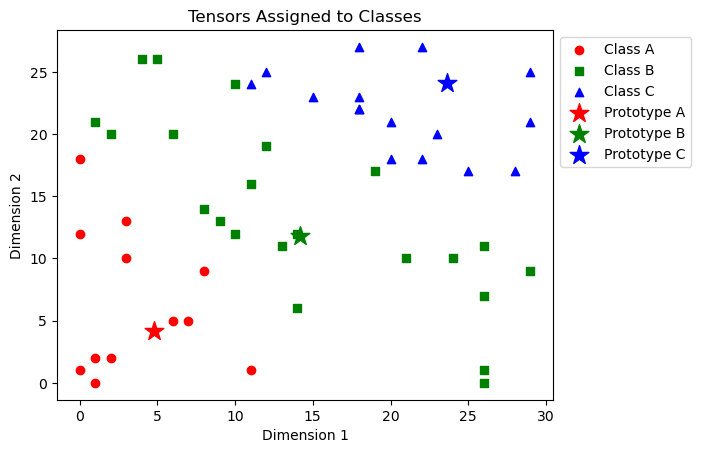

In [91]:
torch.manual_seed(2)
tensor_list = torch.vstack([torch.randint(0, 30, size=(2,), dtype=torch.float32) for _ in range(50)])

# assign each tensor in tensor_list to a class using the minimum distance to a prototype and populate the following lists
class_A_tensors = []
class_B_tensors = []
class_C_tensors = []

# YOUR CODE HERE
for tensor in tensor_list:
    distances = [torch.dist(tensor, class_A_prototype), torch.dist(tensor, class_B_prototype), torch.dist(tensor, class_C_prototype)]
    min_index = torch.argmin(torch.tensor(distances))
    if min_index == 0:
        class_A_tensors.append(tensor)
    elif min_index == 1:
        class_B_tensors.append(tensor)
    else:
        class_C_tensors.append(tensor)

class_A_tensors = torch.vstack(class_A_tensors)
class_B_tensors = torch.vstack(class_B_tensors)
class_C_tensors = torch.vstack(class_C_tensors)

# plot the new tensors assigned to each class and the original prototypes
plt.scatter(class_A_tensors[:, 0], class_A_tensors[:, 1], label='Class A', marker='o', color='red')
plt.scatter(class_B_tensors[:, 0], class_B_tensors[:, 1], label='Class B', marker='s', color='green')
plt.scatter(class_C_tensors[:, 0], class_C_tensors[:, 1], label='Class C', marker='^', color='blue')

plt.scatter(class_A_prototype[0], class_A_prototype[1], label='Prototype A', marker='*', s=200, color='red')
plt.scatter(class_B_prototype[0], class_B_prototype[1], label='Prototype B', marker='*', s=200, color='green')
plt.scatter(class_C_prototype[0], class_C_prototype[1], label='Prototype C', marker='*', s=200, color='blue')

plt.title('Tensors Assigned to Classes')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [92]:
assert len(class_A_tensors) > 0
assert len(class_B_tensors) > 0
assert len(class_C_tensors) > 0

**Side Note**: Such an approach is used in Few Shot Learning, where we have a few examples of each class and we need to classify a new example into one of the classes. The mean tensor of each class is considered as the prototype of the class.

Prototypical Networks are used to generate the M dimensional embedding of the input image. The M dimensional embedding is then used to compute the distance between the input image and the prototype of each class. The class with the minimum distance is assigned to the input image.

Reading: https://analyticsindiamag.com/what-are-prototypical-networks/, https://arxiv.org/pdf/1703.05175.pdf